In [1]:
import pandas as pd
import numpy as np
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns
import matplotlib.colors as mcolors
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.formula.api import mixedlm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as mpl
import matplotlib

colors = list(mcolors.TABLEAU_COLORS.keys())*2


parentDirectory = os.path.abspath(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir),os.pardir))
DATA_DIR = parentDirectory +'/data/'
FIGURES_DIR = parentDirectory +'/figures/'


full_names = {
    'AU': 'Australia',
    'BR': 'Brazil',
    'CA': 'Canada',
    'FR': 'France',
    'DE': 'Germany',
    'IN': 'India',
    'IT': 'Italy',
    'MX': 'Mexico',
    'ES': 'Spain',
    'GB': 'United Kingdom',
    'US': 'United States',
    'DK': 'Denmark',
    'KE': 'Kenya', 
    'NG': 'Nigeria',
    'JP': 'Japan',
    'SE': 'Sweden',
    'ID': 'Indonesia',
    'EG': 'Egypt'
}

event_dicts = [{'country': 'AU',
  'end_md_1': '2020-06-07',
  'start_md_1': '2020-03-27',
  'start_md_2': np.nan},
 {'country': 'BR',
  'end_md_1': '2020-08-09',
  'start_md_1': '2020-03-23',
  'start_md_2': np.nan},
 {'country': 'CA',
  'end_md_1': '2020-06-21',
  'start_md_1': '2020-03-19',
  'start_md_2': '2020-10-12'},
 {'country': 'DE',
  'end_md_1': '2020-05-09',
  'start_md_1': '2020-03-21',
  'start_md_2': '2020-12-18'},
 {'country': 'DK',
  'end_md_1': '2020-05-07',
  'start_md_1': '2020-03-17',
  'start_md_2': np.nan},
 {'country': 'EG',
  'end_md_1': '2020-07-01',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'ES',
  'end_md_1': '2020-06-14',
  'start_md_1': '2020-03-17',
  'start_md_2': '2020-11-07'},
 {'country': 'FR',
  'end_md_1': '2020-06-08',
  'start_md_1': '2020-03-18',
  'start_md_2': '2020-11-01'},
 {'country': 'GB',
  'end_md_1': '2020-08-03',
  'start_md_1': '2020-03-23',
  'start_md_2': '2020-10-21'},
 {'country': 'ID',
  'end_md_1': '2020-08-10',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'IN',
  'end_md_1': '2020-10-29',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'IT',
  'end_md_1': '2020-06-06',
  'start_md_1': '2020-03-11',
  'start_md_2': '2020-11-06'},
 {'country': 'JP',
  'end_md_1': '2020-05-30',
  'start_md_1': '2020-04-12',
  'start_md_2': np.nan},
 {'country': 'KE',
  'end_md_1': '2020-10-04',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'MX',
  'end_md_1': '2020-10-06',
  'start_md_1': '2020-03-25',
  'start_md_2': np.nan},
 {'country': 'NG',
  'end_md_1': '2020-08-09',
  'start_md_1': '2020-03-27',
  'start_md_2': np.nan},
 {'country': 'SE',
  'end_md_1': '2020-04-09',
  'start_md_1': '2020-04-03',
  'start_md_2': np.nan},
 {'country': 'US',
  'end_md_1': '2020-06-11',
  'start_md_1': '2020-03-21',
  'start_md_2': '2020-11-26'}]

df_events = pd.DataFrame(event_dicts)

df_events['start_md_1'] = pd.to_datetime(df_events['start_md_1'])
df_events['end_md_1'] = pd.to_datetime(df_events['end_md_1'])
df_events['start_md_2'] = pd.to_datetime(df_events['start_md_2'])

df_agg = pd.read_pickle(DATA_DIR+'df_agg_cats.pickle')

In [2]:
second_wave_countries = []

for i in event_dicts:
    if type(i['start_md_2'])==str:
        second_wave_countries.append(i['country'])
        
df_agg = df_agg.loc[(df_agg['country'].isin(second_wave_countries)) & (df_agg['country']!='DE')]

In [3]:
#helpers

def generate_equation(order):
    if order == 'Cubic':
        eq = "volume_total ~ intervention_flag*k*year + intervention_flag*np.power(k,2)*year + intervention_flag*np.power(k,3)*year"
    elif order == "Quadratic":
        eq = "volume_total ~ intervention_flag*k*year + intervention_flag*np.power(k,2)*year"
    elif order == "Linear":
        eq = "volume_total ~ intervention_flag*k*year"
    elif order == 'Constant':
        eq = "volume_total ~ intervention_flag*year"
    return eq

def generate_equation_interactions(order):
    if order == 'Cubic':
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category) + intervention_flag*np.power(k,2)*year*C(country)*C(category) + intervention_flag*np.power(k,3)*year*C(country)*C(category)"
    elif order == "Quadratic":
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category) + intervention_flag*np.power(k,2)*year*C(country)*C(category)"
    elif order == "Linear":
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category)"
    elif order == 'Constant':
        eq = "volume_total ~ intervention_flag*year*C(country)*C(category)"
    return eq
    
def get_standard_error_sum(covariates):
    '''
    #95CI is approximated with +- 2 sum_variance_standard_error
    '''
    
    #get the variance covariance matrix
    vcov = result_interactions.cov_params()\
        .loc[covariates,covariates].values
    
    #calculate the sum of all pair wise covariances by summing up
    m_sum = np.sum(vcov)
    
    #variance of a sum of variables is the square root
    return np.sqrt((m_sum))

def make_stars(val):
    if val<0.0001:
        return '****'
    elif val<0.001:
        return '***'
    elif val<0.01:
        return '**'
    elif val<0.05:
        return '*'
    else:
        return ''

def make_star_ste(value,ste):
    if value>0 and value-2*ste>0:
        return '*'
    elif value<0 and value+2*ste<0:
        return '*'
    else:
        return ''

In [4]:
weeks_2019 = list(df_agg.iloc[0]['volume_weekly_total'].index)[:52]
weeks_2020 = list(df_agg.iloc[0]['volume_weekly_total'].index)[52:]

In [5]:
l = []
for cnt, row in df_agg.iterrows():
    start_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_1']
    end_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['end_md_1']
    start_md2 = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_2']
    
    for week in zip(row['volume_weekly_total'].index,row['volume_weekly_total'].values,row['volume_percent_weekly_total'].values):
        
        entry = {}

        entry['country'] = row['country']
        entry['category'] = row['category']
        

        if week[0] in weeks_2020:
            date = pd.to_datetime(week[0])

            entry['k'] = math.floor(((date - start_md2).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['volume_percent'] = week[2]
            entry['year'] = '2020'
            l.append(entry)

        elif week[0] in weeks_2019:
            date = pd.to_datetime(weeks_2020[weeks_2019.index(week[0])])
            
            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md2).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['volume_percent'] = week[2]
            entry['year'] = '2019'
            l.append(entry)

df = pd.DataFrame(l)      

In [6]:
df = df.loc[(df['k'] >= -30) & (df['k'] <= 30)]
df = df.loc[(df['country'].isin(list(full_names.keys())))]
df['intervention_flag'] = df['k'].apply(lambda x: 1 if x >= 0 else 0)

In [7]:
df.groupby('country')['k'].agg('min')

country
CA   -30
ES   -30
FR   -30
GB   -30
IT   -30
US   -30
Name: k, dtype: int64

In [8]:
df.groupby('country')['k'].agg('max')

country
CA    11
ES     8
FR     9
GB    10
IT     8
US     5
Name: k, dtype: int64

In [9]:
cats = list(df['category'].unique())
k = 30

In [10]:
df_temp = df.loc[(df['k'] >= -k) & (df['k'] <= k)].copy()
df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)
mod = smf.ols(generate_equation_interactions('Quadratic'), data = df_temp)
result_interactions = mod.fit(cov_type='hc0')

In [11]:
default_country = 'CA'
default_category = 'beef dish'

alpha_baseline = 'intervention_flag:year[T.2020]'
beta_baseline = 'intervention_flag:k:year[T.2020]'
gamma_baseline = 'intervention_flag:np.power(k, 2):year[T.2020]'

list_results = []

for country in second_wave_countries:
    if country =='DE':
        continue
    for c in cats:
        
        entry = {}
        entry['country']  = country
        entry['category'] = c
        
        suffix_country = (':C(country)[T.'+country+']')
        suffix_category = (':C(category)[T.'+c+']')
        
        if country == default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline])
            total_alpha_error = (result_interactions.bse[alpha_baseline])
            
            total_beta = (result_interactions.params[beta_baseline])
            total_beta_error = (result_interactions.bse[beta_baseline])
            
            total_gamma = (result_interactions.params[gamma_baseline])
            total_gamma_error = (result_interactions.bse[gamma_baseline])
            
        elif country == default_country and c != default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_category]) 
            total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                         beta_baseline + suffix_category]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_category]) 
            total_gamma_error = (get_standard_error_sum([gamma_baseline, 
                                                         gamma_baseline + suffix_category]))

        elif country != default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline,
                                                         alpha_baseline + suffix_country]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_country]) 
            total_beta_error = (get_standard_error_sum([beta_baseline,
                                                         beta_baseline + suffix_country]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_country]) 
            total_gamma_error = (get_standard_error_sum([gamma_baseline,
                                                         gamma_baseline + suffix_country]))

        else:
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) \
                    + (result_interactions.params[alpha_baseline + suffix_country + suffix_category])
            
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category,
                                                         alpha_baseline + suffix_country, 
                                                         alpha_baseline + suffix_country + suffix_category]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_country]) \
                    + (result_interactions.params[beta_baseline + suffix_category]) \
                    + (result_interactions.params[beta_baseline + suffix_country + suffix_category])
            
            total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                         beta_baseline + suffix_category,
                                                         beta_baseline + suffix_country, 
                                                         beta_baseline + suffix_country + suffix_category]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_country]) \
                    + (result_interactions.params[gamma_baseline + suffix_category]) \
                    + (result_interactions.params[gamma_baseline + suffix_country + suffix_category])
            
            total_gamma_error = (get_standard_error_sum([gamma_baseline, 
                                                         gamma_baseline + suffix_category,
                                                         gamma_baseline + suffix_country, 
                                                         gamma_baseline + suffix_country + suffix_category]))
            
        entry['alpha'] = total_alpha
        entry['alpha_ste'] = total_alpha_error
        entry['beta'] = total_beta
        entry['beta_ste'] = total_beta_error
        entry['gamma'] = total_gamma
        entry['gamma_ste'] = total_gamma_error
        
        list_results.append(entry)
        
df_results = pd.DataFrame(list_results)
df_results_interactions = pd.DataFrame(list_results)

## a) For all categories, show alpha in different countries

In [12]:
cats_sorted = list(df_results.groupby('category')['alpha'].agg('mean').sort_values(ascending = False).index)
countries_sorted = list(df_results.groupby('country')['alpha'].\
     agg('mean').sort_values(ascending = False).index)

In [13]:
sorterIndex = dict(zip(countries_sorted, range(len(countries_sorted))))

def sort_pd(key=None,reverse=False):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) 
           for i in sorted(series_list,key=key,reverse=reverse)]
    return sorter

sort_by_custom_dict = sort_pd(key=sorterIndex.get)

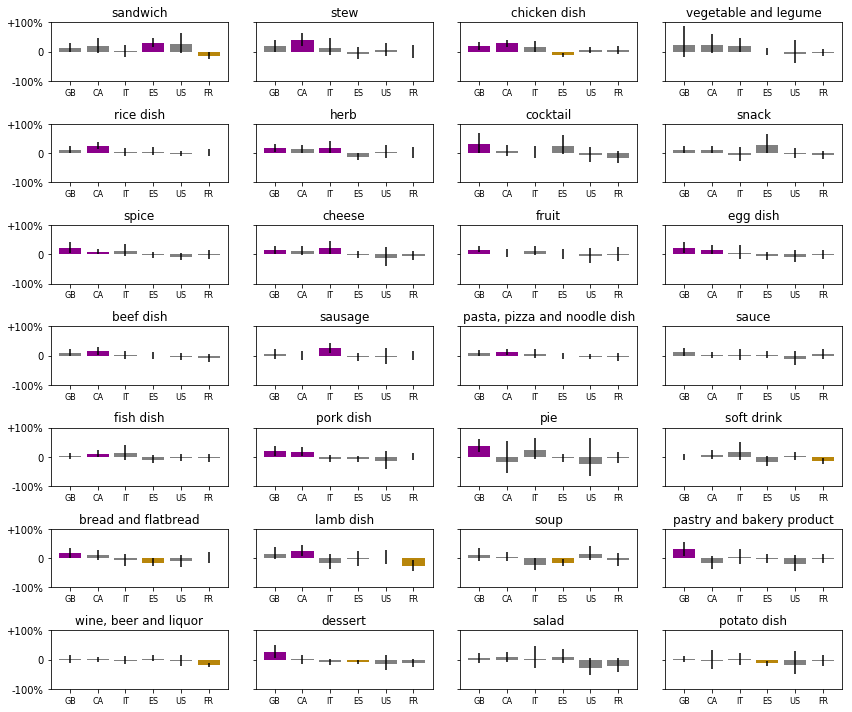

In [14]:
fig, axes = plt.subplots(7,4, figsize = (12,10), sharey = True)

for cnt,c in enumerate(cats_sorted):
    sbplt = axes[math.floor(cnt/4), cnt%4]
    x = df_results.loc[df_results['category'] == c].iloc[sort_by_custom_dict(df_results.loc[df_results['category'] == c]['country'])][['alpha','country','alpha_ste']]
    
    colors_bars = []
    for i in range(6):
        if x['alpha'].values[i]>0 and x['alpha'].values[i]-2*x['alpha_ste'].values[i]>0:
            colors_bars.append('darkmagenta')
        elif x['alpha'].values[i]<0 and x['alpha'].values[i]+2*x['alpha_ste'].values[i]<0:
            colors_bars.append('darkgoldenrod')
        else:
            colors_bars.append('gray')
            
    #sbplt.bar(range(12),x['alpha'].apply(lambda x: np.exp(x)-1), yerr = 2*x['alpha_ste'].apply(lambda x: np.exp(x)-1), color = colors_bars)
    
    sbplt.bar(range(6),x['alpha'].apply(lambda x: np.exp(x)-1),
            #here we convert errors back to linear scale
            yerr = np.array([x['alpha'].apply(lambda x: np.exp(x)-1) - (x['alpha']-2*x['alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (x['alpha']+2*x['alpha_ste']).apply(lambda x: np.exp(x)-1) - x['alpha'].apply(lambda x: np.exp(x)-1)]), 
            color = colors_bars)
    
    sbplt.set_xticks(range(6))
    sbplt.set_xticklabels(x['country'], fontsize= 8)
    sbplt.set_title(c)
    
    sbplt.set_yticks([-1,0,1,2,3])
    sbplt.set_yticklabels(["-100%","0","+100%","+200%","+300%"])
    sbplt.set_ylim([-1,1])

#fig.suptitle("α", position = (0.5, 1.05))
plt.tight_layout()

plt.savefig(FIGURES_DIR+"second_wave_cats_effects.pdf", bbox_inches='tight')